<a href="https://colab.research.google.com/github/KemasRaihan/BankAccount/blob/main/face_detection_26022493.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection
Artificial Intelligence and Machine Learning 1

Submission date/time: __27 April 2022, 3PM__


---





## Step 1: Import Machine Learning Libraries for this task

Check all the

`import [library full name] as [short name]` 

in the skeleton code. If you use any off-line IDE, such as
PyCharm, make sure you pre-installed all the required Python libraries for the machine learning task. Please
contact the tutor if you need any technical support to set up your coding environment. 

If you need any extra tools/libraries, please also add them here

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
%matplotlib inline

from skimage import data,color,feature
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

#Some more libraries of your choice goes here


## Step 2: Data Preparation
* Mount your google drive to this project
* Load files: `positive_patches.npy` and `negative_patches.npy`
* The dataset has __13233__ positive data and __30000__ negative data
* Reshape the raw patches (1-D 2914 pixels per picture) as 2-D __62*47__ image patches
* Display some positive samples and negative samples 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Add your code here
!python -m pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Your code goes here
from skimage.io import imread_collection

**Load Positive Patches**

In [5]:
filepath = '/content/drive/MyDrive/Sheffield_Hallam_University/Second_Year/AI_and_ML_1/Assignment/positive_patches.npy'
pos_samples  = np.load(filepath)

**Load Negative Patches**

In [6]:
filepath = '/content/drive/MyDrive/Sheffield_Hallam_University/Second_Year/AI_and_ML_1/Assignment/negative_patches.npy'
neg_samples  = np.load(filepath)

**Reshape the patches**

Here we are reshaping our samples to be 62x47 patches in order to be displayed as images. 

In [7]:
l = len(pos_samples)
pos_samples = [img.reshape(62,47) for img in pos_samples]
neg_samples = [img.reshape(62,47) for img in neg_samples]

**Display First 30 Positive Patches images**

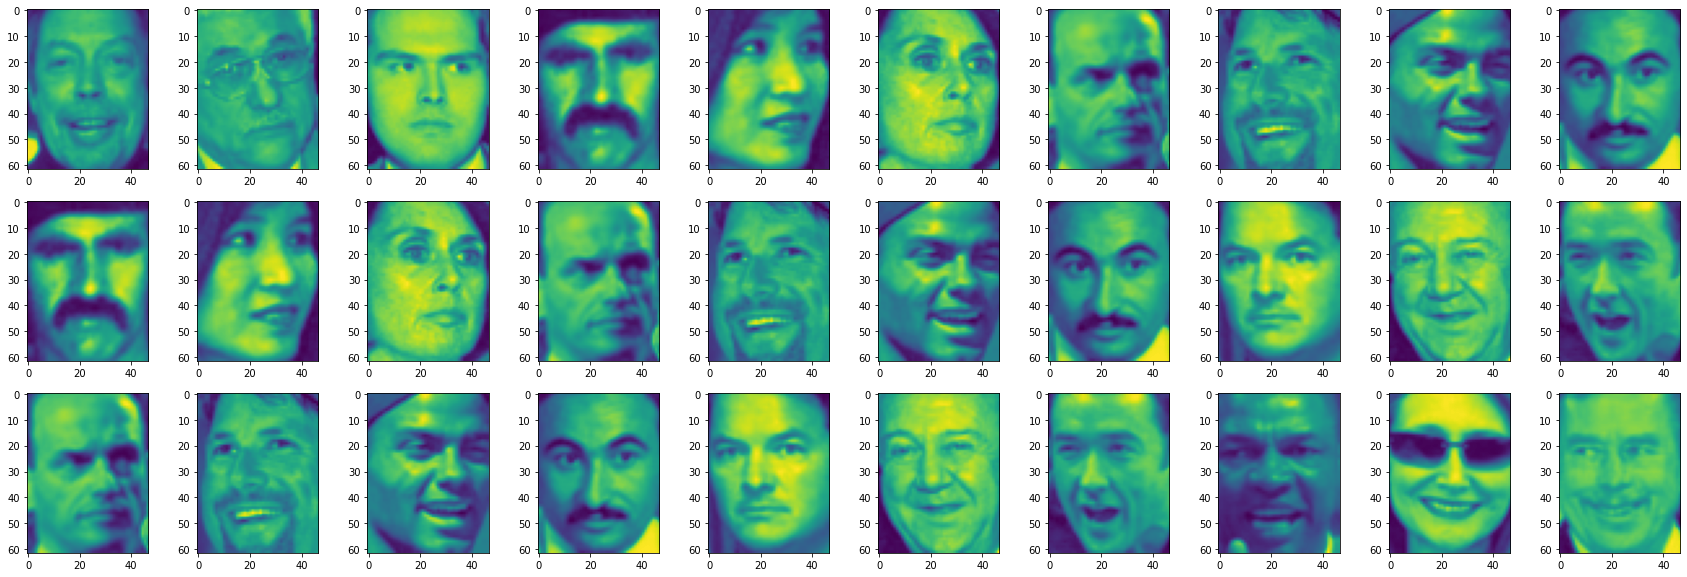

In [8]:
fig, axes = plt.subplots(3,10, figsize=(30,10))
for i in range(3):
  for j in range(10):
    axes[i][j].imshow(pos_samples[3*i+j])

**Display First 30 Negative Patches**

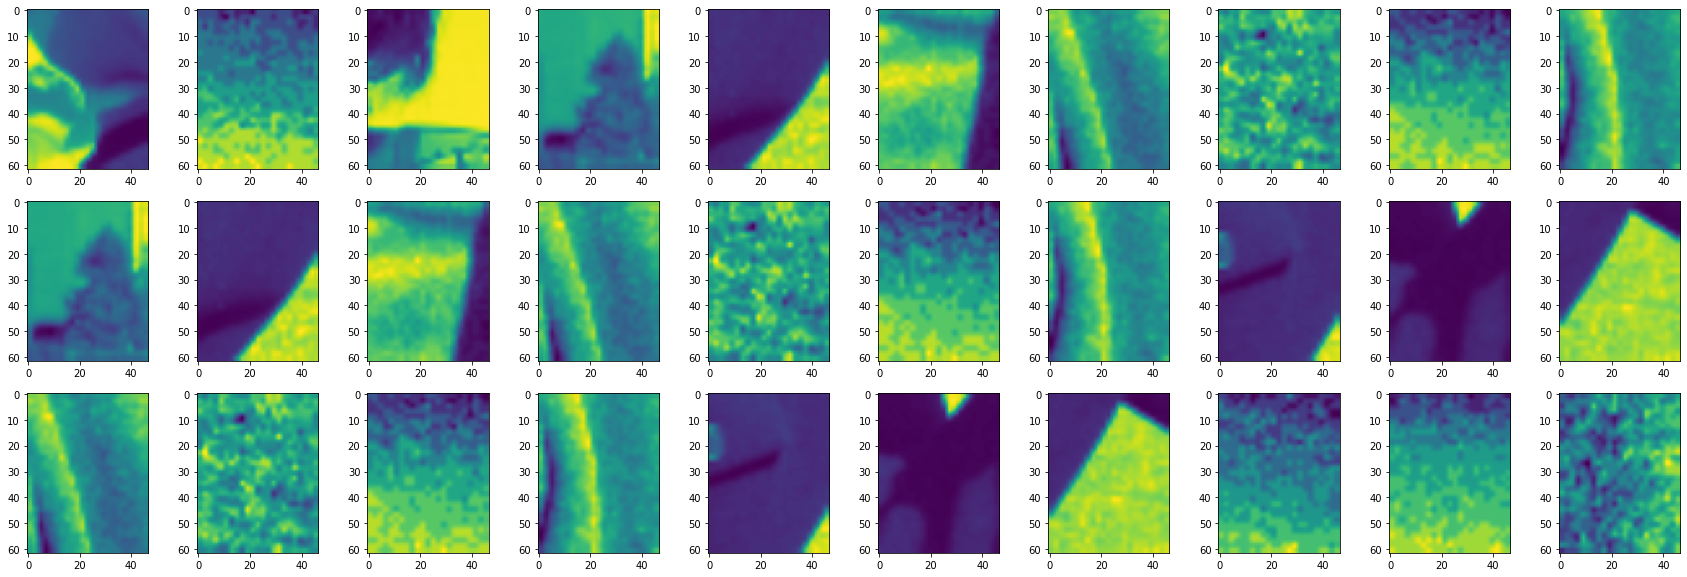

In [9]:
fig, axes = plt.subplots(3,10, figsize=(30,10))
for i in range(3):
  for j in range(10):
    axes[i][j].imshow(neg_samples[3*i+j])

## Step 3: Feature Extraction and Binary Labels
We will use a Sci-kit Learn Image Processing (A Wrap version of the OpenCV) package to extract the 2D HoG features and use them as the feature space for the machine learning algorithms.

Also, face detection uses binary classification algorithms, which requires feature space `X` and labels `y`



In [10]:
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

**Display Negative Samples**

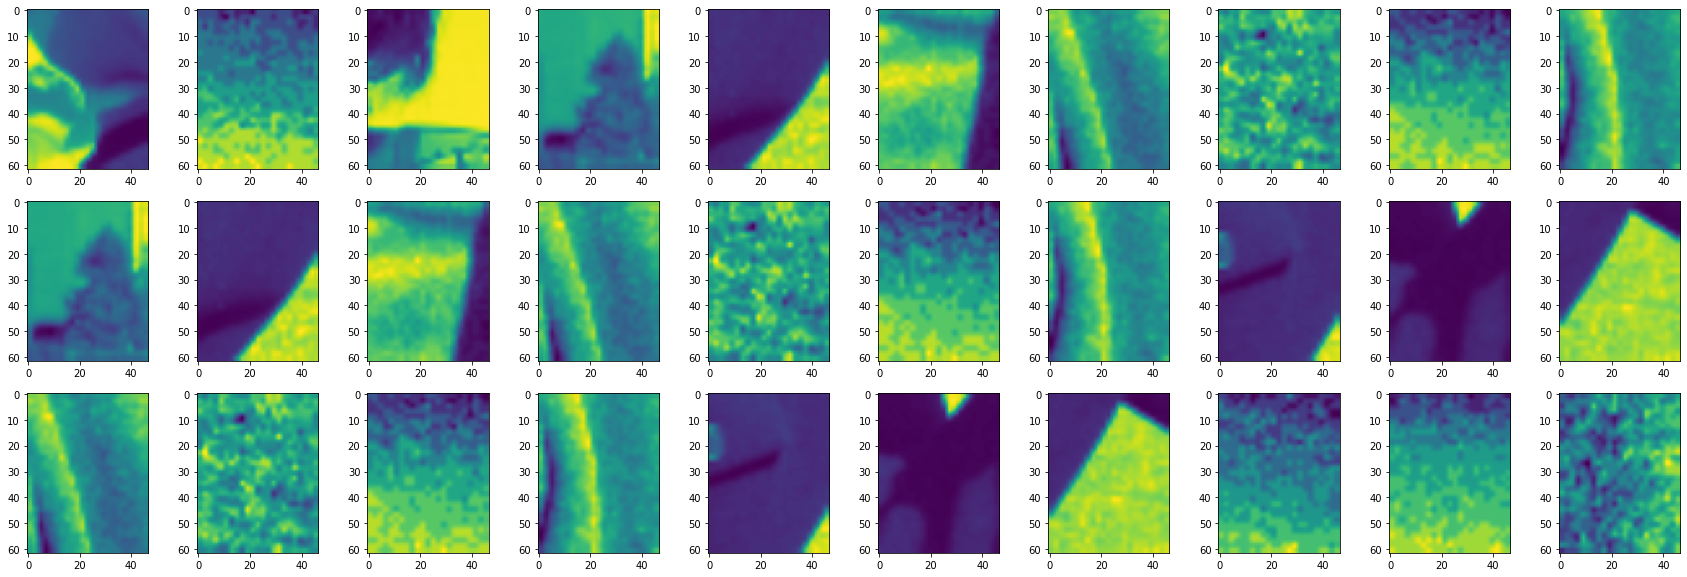

In [11]:
fig, axes = plt.subplots(3,10, figsize=(30,10))
for i in range(3):
  for j in range(10):
    axes[i][j].imshow(neg_samples[3*i+j])

# **Define Feature Space**

**Specification:**

✅ Define a feature space based on the data samples. 

✅ You can use data visualisation tools to find correlated
dimensions. 

✅ You can also measure and analyse features and target dependencies for the tasks. 

✅ You can also try to use some untaught projection or embedding techniques for the visualisation, such as Principal
Component Analysis (PCA), or t-Distributed Stochastic Neighbour Embedding (t-SNE) for your feature
analysis tasks.


---
**Solution:**

Here will define the feature space X to be the pixel intensities and intensities of the gradients of the pixels of our positive and negative patches by chaining the inputs from both patches and storing them in our numpy array, as these gradients will detect our edges in our images. 



In [12]:
#Add your code here
from itertools import chain
X = np.array([hog(img, multichannel=False) for img in chain(pos_samples,neg_samples)])

<ipython-input-12-275d06a852fe>:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  X = np.array([hog(img, multichannel=False) for img in chain(pos_samples,neg_samples)])


**Add Labels**

Here 1 will be the label for images that contains celebrities while 0 will be images that will contain them.

In [13]:
y=np.zeros(len(X))
y[0:len(pos_samples)]=1

## Step 4: Train Your Binary Classification ML Algorithm(s)
* Split the training and test set. Remember to shuffle them 
* Use some suitable machine learning algorithms (which one?) to create a classifier.
* If the training takes too long, you may consider saving your trained model 

**Split Data For Training and Testing**

In [14]:
#Add your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Train using KNN**

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Train using SVC**

In [16]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

**Train using Decision Tree Classifier**

In [26]:
dt = DecisionTreeClassifier()
dt. fit(X_train, y_train)

DecisionTreeClassifier()

**Train using Random Forest Classifier**

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

**Save Models**

In [39]:
filepath_knn = '/content/drive/MyDrive/Sheffield_Hallam_University/Second_Year/AI_and_ML_1/Assignment/face_detector_KNN.pickle'
filepath_svm = '/content/drive/MyDrive/Sheffield_Hallam_University/Second_Year/AI_and_ML_1/Assignment/face_detector_SVM.pickle'
filepath_dt = '/content/drive/MyDrive/Sheffield_Hallam_University/Second_Year/AI_and_ML_1/Assignment/face_detector_DT.pickle'
filepath_rf = '/content/drive/MyDrive/Sheffield_Hallam_University/Second_Year/AI_and_ML_1/Assignment/face_detector_RF.pickle'

In [42]:
import pickle

#KNN
with open(filepath_knn,'wb') as handle:
  pickle.dump(knn, handle)

#SVC
with open(filepath_svm,'wb') as handle:
  pickle.dump(svm, handle)

#DT
with open(filepath_dt,'wb') as handle:
  pickle.dump(dt, handle)

#RF
with open(filepath_rf,'wb') as handle:
  pickle.dump(rf, handle)

**Load Models**

In [41]:
#KNN
with open(filepath_knn,'rb') as handle:
  knn = pickle.load(handle)

#SVC
with open(filepath_svm,'rb') as handle:
  svm = pickle.load(handle)

#DT
with open(filepath_dt,'rb') as handle:
  svm = pickle.load(handle)

#RF
with open(filepath_rf,'rb') as handle:
  svm = pickle.load(handle)

FileNotFoundError: ignored

## Step 5: Performance Validation

* Use test dataset to calculate the confusion matrix
* If you use more than one algorithm or carried out some comparison tests, generate multiple confusion matrices for each case

In [34]:
def create_confusion_matrix(model, X_validation, y_true):
  y_pred = model.predict(X_validation)
  labels = unique_labels(y_true)
  columns_ = [f'Predicted: {label}' for label in labels]
  index_ = [f'Actual: {label}' for label in labels]
  return pd.DataFrame(confusion_matrix(y_true, y_pred), columns=columns_, index=index_)

In [32]:
conf_mx = create_confusion_matrix(knn, X_test, y_test)

<Axes: >

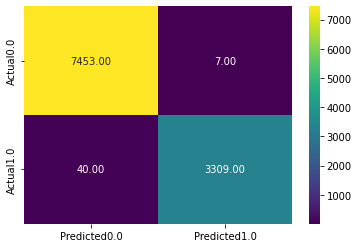

In [33]:
sns.heatmap(conf_mx, annot=True, fmt='.2f', cmap='viridis')

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVCclassifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

In [ ]:
#Add your code here


## Extra Task

Complete the skeleton code gives you a solid foundation to build an effective face detection system. You are
encouraged to carry out more exploration from there and aim at creating a better face detection application. You
can either use taught or untaught techniques for this project. You are welcome to add new functions and improve
the source code. You can discuss the ideas if you have specific additions in mind. 


In [ ]:
#Add your code here
